# Exe. 1

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10) 

In [ ]:
import pandas as pd
import io
from sklearn.utils import shuffle
from google.colab import files

uploaded = files.upload()
wine = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']), sep=';')

Saving winequality-white.csv to winequality-white (1).csv


In [ ]:
wine = shuffle(wine)[:1000]

In [ ]:
wine.iloc[:,11].nunique()

7

# Exe. 2

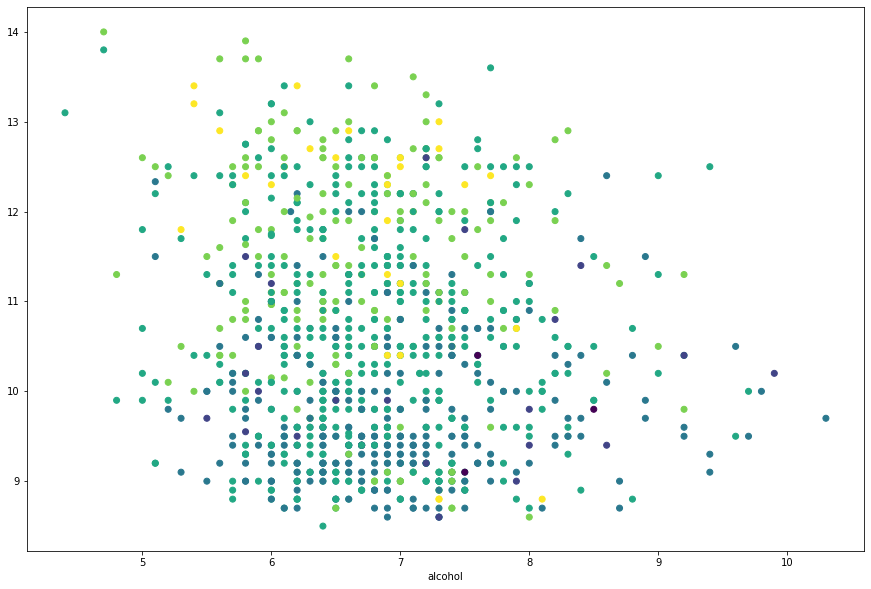

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(wine['fixed acidity'],
            wine['alcohol'],
            c=wine['quality'],
            cmap='viridis')

plt.xlabel('fixed acidity')
plt.xlabel('alcohol')
plt.show()

# Exe. 3

In [ ]:
from keras.utils import to_categorical

X = wine.iloc[:, :11].values
# Here we need to specify the number of different values the quality can take 
# because we only take a subset of our data and may not have all the possible
# value of quality in it
y = to_categorical(wine.iloc[:, 11].values, 10) 

# Exe. 4

In [ ]:
n_train = int(0.8 * y.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
print(f"trainX shape: {trainX.shape}")
print(f"testX shape: {testX.shape}")
print(f"trainy shape: {trainy.shape}")
print(f"testy shape: {testy.shape}")

trainX shape: (800, 11)
testX shape: (200, 11)
trainy shape: (800, 10)
testy shape: (200, 10)


# Exe. 5

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(50, input_dim=11, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Exe. 6

In [ ]:
from keras.optimizers import SGD

lrate = 0.1
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=lrate),
    metrics=['accuracy']
)

# Exe. 7

In [ ]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

# Exe. 8

Text(0.5, 1.0, 'lrate=0.1')

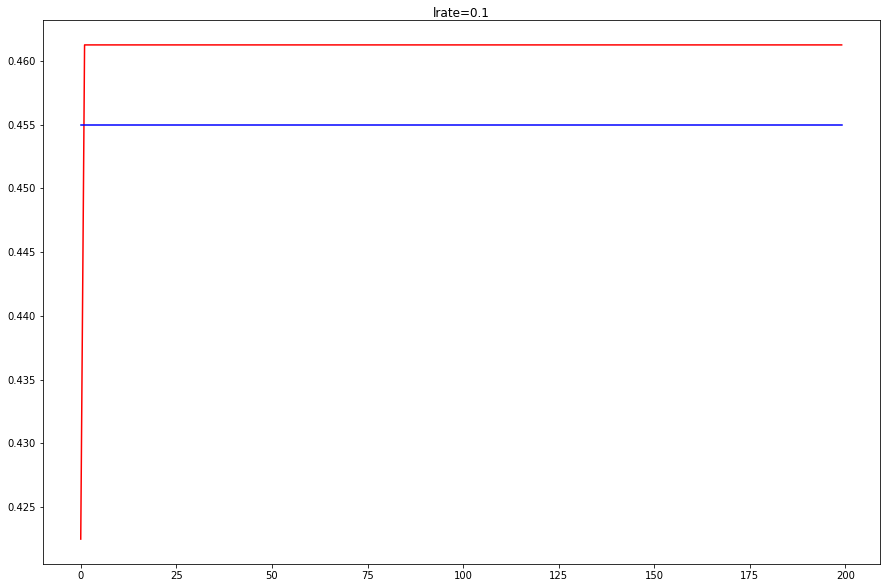

In [ ]:
plt.plot(history.history['accuracy'], label='train', color='r')
plt.plot(history.history['val_accuracy'], label='test', color='b')
plt.title(f'lrate={lrate}', pad=-50)

# Exe. 9

In [ ]:
def fit_model(trainX, trainy, testX, testy, lrate):
    model = keras.Sequential([
        keras.layers.Dense(50, input_dim=11, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.SGD(learning_rate=lrate),
        metrics=['accuracy']
    )
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    plt.plot(history.history['accuracy'], label='train', color='r')
    plt.plot(history.history['val_accuracy'], label='test', color='b')
    plt.title(f'lrate={lrate}', pad=-50)

# Exe. 10

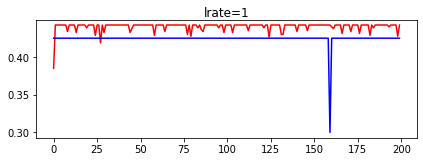

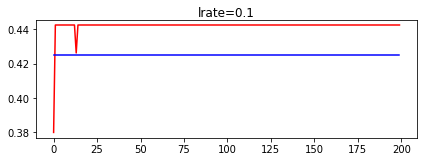

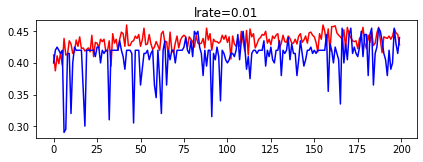

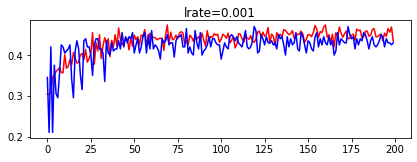

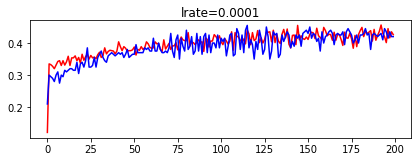

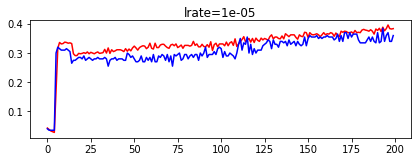

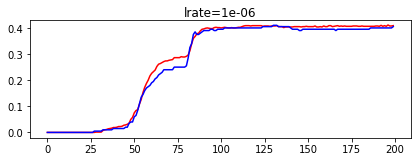

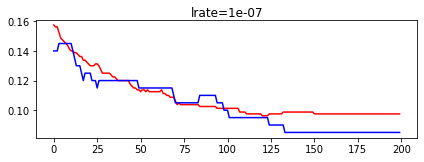

In [ ]:
learning_rates = [1 * 10**(-n) for n in range(8)]
for i in range(len(learning_rates)):
    plot_no = 420 + (i + 1)
    plt.subplot(plot_no)
    fit_model(trainX, trainy, testX, testy, learning_rates[i])
    plt.show()

From the results (at the time of writing) the learning rates of `1`, `0.1`, `0.01` and `1e-07` are not suited for our model (the first two being "too fast" and I suspect the last one tends to be stucks on plateaux). The learning rates  `0.001` and `0.0001` have very similar shapes, a training set with steep curve then a somewhat stable accuracy (even tough it increases a little for `0.001`) and a validation set with a high variance.
For the learning rate `1e-05` and `1e-06` the model seems to either overfit or be not that bad.
In conclusion the best learning rate for our model seems to be either `0.001` or  `0.0001`.

# Exe. 11

In [ ]:
def fit_model_momentum(trainX, trainy, testX, testy, momentum):
    model = keras.Sequential([
        keras.layers.Dense(50, input_dim=11, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=momentum),
        metrics=['accuracy']
    )
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    plt.plot(history.history['accuracy'], label='train', color='r')
    plt.plot(history.history['val_accuracy'], label='test', color='b')
    plt.title(f'momentum={momentum}', pad=-50)

# Exe. 12

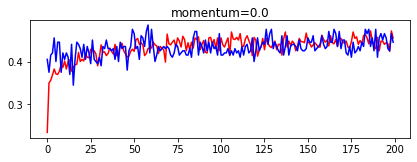

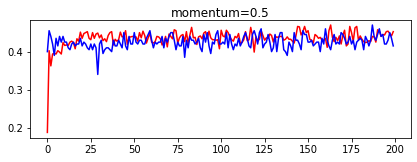

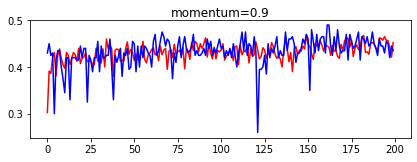

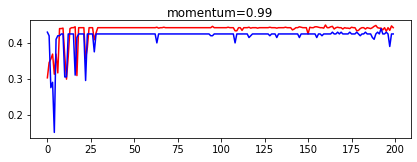

In [ ]:
momentum = [0.0, 0.5, 0.9, 0.99]
for i, m in enumerate(momentum):
    plot_no = 420 + (i + 1)
    plt.subplot(plot_no)
    fit_model_momentum(trainX, trainy, testX, testy, m)
    plt.show()

We can see that the training is faster and less versatile when using a high momentum. For a momentum of `0.99` the variance of both accuracy is very low (in comparison with the other models).

# Exe. 13

In [ ]:
def decay_lrate(initial_rate, decay, iteration):
    return initial_rate * (1.0 / (1.0 + decay * iteration))

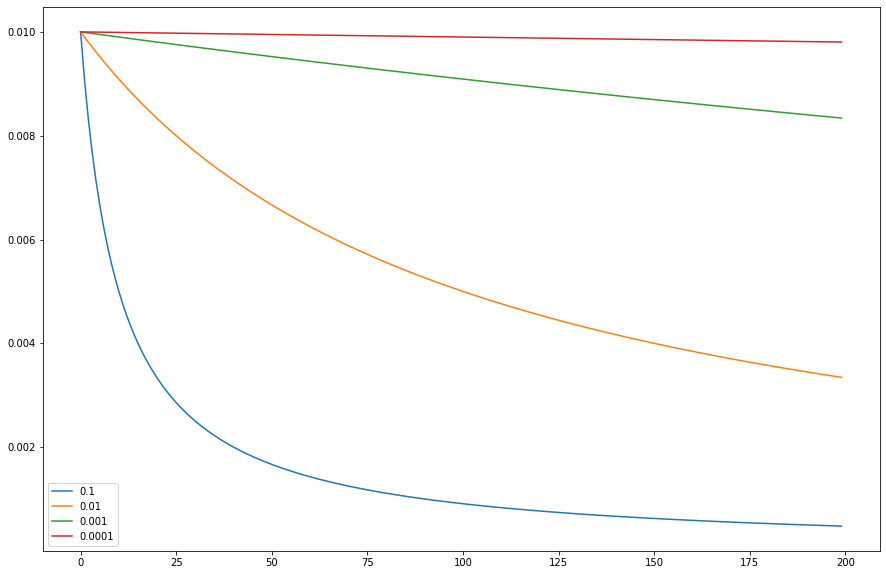

In [ ]:
decays = [1 * 10**(-n) for n in range(1, 5)]
lrate = 0.01
n_updates = 200
for decay in decays:
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    plt.plot(lrates, label=str(decay))
plt.legend()
plt.show()

# Exe. 14

In [ ]:
def fit_model_decay(trainX, trainy, testX, testy, decay):
    model = keras.Sequential([
        keras.layers.Dense(50, input_dim=11, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.SGD(learning_rate=0.0001, decay=decay),
        metrics=['accuracy']
    )
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    plt.plot(history.history['accuracy'], label='train', color='r')
    plt.plot(history.history['val_accuracy'], label='test', color='b')
    plt.title(f'decay={decay}', pad=-50)

# Exe. 15

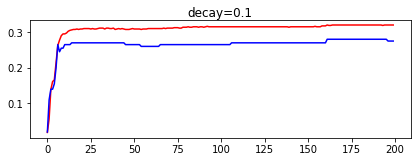

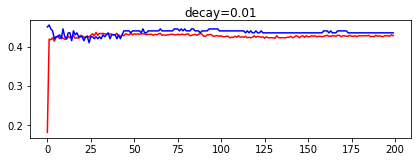

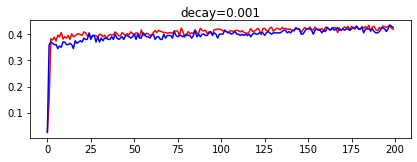

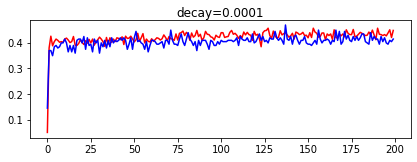

In [ ]:
decays = [1*10**(-n) for n in range(1, 5)]
for i, d in enumerate(decays):
    plot_no = 420 + (i + 1)
    plt.subplot(plot_no)
    fit_model_decay(trainX, trainy, testX, testy, d)
    plt.show()

We can see that a too low decay doesn't impact the model and a too high decay leads too poor performance.

# Exe. 16

In [ ]:
def fit_model_opt(trainX, trainy, testX, testy, opt_name):
    model = keras.Sequential([
        keras.layers.Dense(50, input_dim=11, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        loss='categorical_crossentropy',
        optimizer=opt_name,
        metrics=['accuracy']
    )
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    plt.plot(history.history['accuracy'], label='train', color='r')
    plt.plot(history.history['val_accuracy'], label='test', color='b')
    plt.title(f'opt={opt_name}', pad=-50)

# Exe. 17

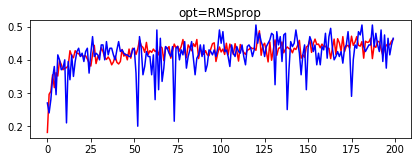

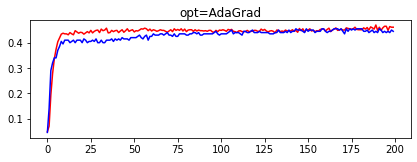

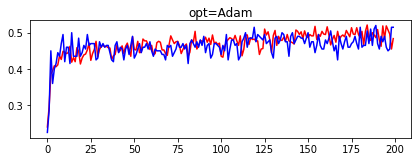

In [ ]:
opt_names = ["RMSprop", "AdaGrad", "Adam"]
for i, opt in enumerate(opt_names):
    plot_no = 420 + (i + 1)
    plt.subplot(plot_no)
    fit_model_opt(trainX, trainy, testX, testy, opt)
    plt.show()

We can see that AdaGrad optimizer stopped at a lower accuracy than the other two optimizers (maybe due to a too strong learning rate decrease).
The RMSprop optimizer achieves better performance than the previous models but the validation set accuracy has a high variance. In contraty the Adam optimizer seems to have a high accuracy with a low variance and seems to be the best optimizer in our context.